In [4]:
pip install findspark pandas awswrangler numpy matplotlib seaborn pyspark


[notice] A new release of pip is available: 24.1.2 -> 25.1.1
[notice] To update, run: python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
import findspark
import pandas as pd
import awswrangler as wr
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import matplotlib.ticker as ticker
import boto3
import statistics

/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_72217/2968665954.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_result = df.groupby([


    forecastDistance  final_result
0                  0      0.274274
1                  1      0.273219
2                  2      0.274092
3                  3      0.274573
4                  4      0.274794
5                  5      0.273362
6                  6      0.274281
7                  7      0.275259
8                  8      0.275205
9                  9      0.275350
10                10      0.274831
11                11      0.275248
12                12      0.274281
13                13      0.275878
14                14      0.276483
15                15      0.275646
16                16      0.274507
17                17      0.276331
18                18      0.275340
19                19      0.273734
20                20      0.274144
21                21      0.274409
22                22      0.275553
23                23      0.274758
24                24      0.273572
25                25      0.274848
26                26      0.273344
27                27

/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_72217/2968665954.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_result = df.groupby([


    forecastDistance  final_result
0                  0      0.273384
1                  1      0.273725
2                  2      0.276104
3                  3      0.279778
4                  4      0.276346
5                  5      0.284808
6                  6      0.291527
7                  7      0.291385
8                  8      0.293533
9                  9      0.305804
10                10      0.306649
11                11      0.303645
12                12      0.321055
13                13      0.324951
14                14      0.351843
15                15      0.349082
16                16      0.340544
17                17      0.361085
18                18      0.370012
19                19      0.362256
20                20      0.368336
21                21      0.380755
22                22      0.391563
23                23      0.370889
24                24      0.367572
25                25      0.428523
26                26      0.406474
27                27

/var/folders/x0/w5vkfm815t50y972318hw4880000gq/T/ipykernel_72217/2968665954.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_result = df.groupby([


    forecastDistance  final_result
0                  0      0.275727
1                  1      0.278861
2                  2      0.279763
3                  3      0.284064
4                  4      0.288278
5                  5      0.300789
6                  6      0.303568
7                  7      0.309561
8                  8      0.310633
9                  9      0.316559
10                10      0.322554
11                11      0.341316
12                12      0.346623
13                13      0.379581
14                14      0.379401
15                15      0.362300
16                16      0.405590
17                17      0.412405
18                18      0.411534
19                19      0.415562
20                20      0.449340
21                21      0.422112
22                22      0.494425
23                23      0.485204
24                24      0.474797
25                25      0.497338
26                26      0.552049
27                27

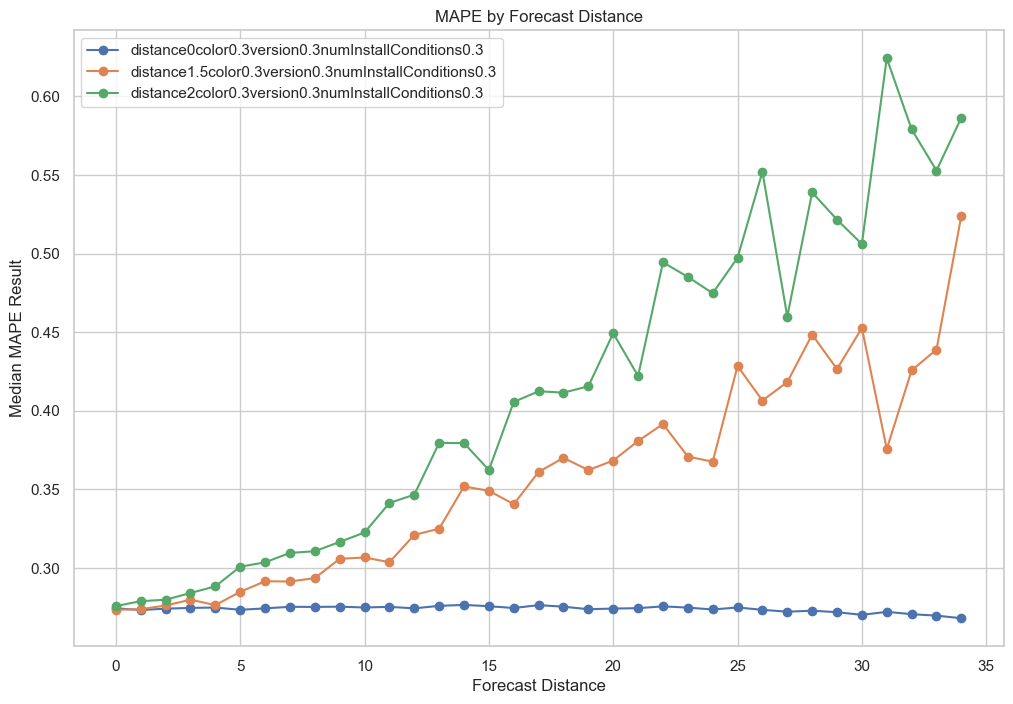

In [6]:
findspark.init()
analysis = [
    "distance0color0.3version0.3numInstallConditions0.3",
    "distance1.5color0.3version0.3numInstallConditions0.3",
    "distance2color0.3version0.3numInstallConditions0.3",
]

seaborn.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

# fig, ((ax1,ax2,ax3)) = plt.subplots(3, 1, figsize=(12, 15))
# subplots = [ax1, ax2, ax3]
# subplotidx = 0
# fig.subplots_adjust(hspace=0.5)

for dataset in analysis:
    df = pd.read_parquet(f'../../generate data/5.2/forecastdistance/{dataset}/')
    df = df[~df["partCodeId"].str.contains("model")]
    df = df[df["forecastDistance"] < 35]
    # df["forecastDistance"] = df["forecastDistance"] - 5


    df["formula_result"] = (df["dfQuantity"] - df["actualQuantity"]).abs() / df["actualQuantity"]
    # Group by the correct columns
    df_result = df.groupby([
        "partCodeId",
        "vehicleModelId",
        "forecastDistance"
    ]).agg(
        final_result=("formula_result", "mean"),
        number= ("partCodeId", "count"),
    ).reset_index()

    df_result = df_result[df_result["number"] > 0 ]
    

    # Remove values that are below 0
    df_result = df_result[df_result["final_result"] >= 0]


    # Group by forecastdistance and calculate the median for each group
    df_forecast_distance_median = df_result.groupby("forecastDistance")["final_result"].quantile(0.5).reset_index()
    print(df_forecast_distance_median)

    plt.plot(df_forecast_distance_median["forecastDistance"],df_forecast_distance_median["final_result"], marker='o')


    # Plot the results
    # subplots[subplotidx].plot(df_forecast_distance_median["forecastDistance"], df_forecast_distance_median["final_result"], marker='o')
    # subplots[subplotidx].set_title(f"MAPE by Forecast Distance for {dataset}")
    # subplots[subplotidx].set(xlabel="Forecast Distance", ylabel="Median MAPE Result")
    # subplots[subplotidx].grid(True)
    # subplotidx += 1

    #     # Function to remove the top 10% of the highest values and calculate the median
    # def remove_top_10_percent_and_median(group):
    #     # Calculate the number of values to remove
    #     n = int(len(group) * 0.1)
    #     # Remove the top 10% of the highest values
    #     group = group.nsmallest(len(group) - n)
    #     # Return the median of the remaining values
    #     return group.median()

    # # Function to remove the top 10% and bottom 10% of the values and calculate the median
    # def remove_top_and_bottom_10_percent_and_median(group):
    #     # Calculate the number of values to remove
    #     n = int(len(group) * 0.1)
    #     # Remove the top 10% and bottom 10% of the values
    #     group = group.sort_values().iloc[n:-n]
    #     # Return the median of the remaining values
    #     return group.median()

    # #group by partcode and calculate the median for each partcode
    # df_partcode_median = df_result.groupby("partCodeId")["final_result_capped"].median().reset_index()
    # plt.figure(figsize=(10, 6))
    # plt.hist(df_partcode_median["final_result_capped"], bins=5 if dataset == "dist3ics0col0idx0" else 20)
    # plt.axvline(df_partcode_median["final_result_capped"].quantile(0.25), color='g')
    # plt.axvline(df_partcode_median["final_result_capped"].quantile(0.5), color='r')
    # plt.axvline(df_partcode_median["final_result_capped"].quantile(0.75), color='b')
    # plt.xlabel("Median Final Result")
    # plt.ylabel("Frequency")
    # plt.title(f"Histogram of MAPE Median for {dsname} by Partcode")
    # plt.grid(True)
    # plt.show()

    # #group by partcode, remove the 10% of the highest values and calculate the median for each partcode
    # df_partcode_median_without_top_values = df_result.groupby("partCodeId")["final_result_capped"].apply(remove_top_10_percent_and_median).reset_index()
    # #print the df_partcode_median in a histogram
    # plt.figure(figsize=(10, 6))
    # plt.hist(df_partcode_median_without_top_values["final_result_capped"], bins=5 if dataset == "dist3ics0col0idx0" else 20)
    # plt.axvline(df_partcode_median["final_result_capped"].quantile(0.25), color='g')
    # plt.axvline(df_partcode_median["final_result_capped"].quantile(0.5), color='r')
    # plt.axvline(df_partcode_median["final_result_capped"].quantile(0.75), color='b')
    # plt.xlabel("Median Final Result")
    # plt.ylabel("Frequency")
    # plt.title(f"Histogram of MAPE Median for {dsname} by Partcode Removing the Top 10%")
    # plt.grid(True)
    # plt.show()

    # #group by partcode, remove the 10% of the highest and lowest values and calculate the median for each partcode
    # df_partcode_median_without_top_and_bottom_values = df_result.groupby("partCodeId")["final_result_capped"].apply(remove_top_and_bottom_10_percent_and_median).reset_index()
    # #print the df_partcode_median in a histogram
    # plt.figure(figsize=(10, 6))
    # plt.hist(df_partcode_median_without_top_and_bottom_values["final_result_capped"], bins=5 if dataset == "dist3ics0col0idx0" else 20)
    # plt.axvline(df_partcode_median["final_result_capped"].quantile(0.25), color='g')
    # plt.axvline(df_partcode_median["final_result_capped"].quantile(0.5), color='r')
    # plt.axvline(df_partcode_median["final_result_capped"].quantile(0.75), color='b')
    # plt.xlabel("Median Final Result")
    # plt.ylabel("Frequency")
    # plt.title(f"Histogram of MAPE Median for {dsname} by Partcode Removing the Top and Bottom 10%")
    # plt.grid(True)
    # plt.show()

plt.title(f"MAPE by Forecast Distance")
plt.xlabel(f"Forecast Distance")
plt.ylabel(f"Median MAPE Result")
plt.grid(True)    
plt.legend(analysis)    
plt.show()